In [1]:
# Using maf_proto branch of rubin_sim

In [2]:
import numpy as np
import rubin_sim.maf_proto as maf
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import sqlite3
import healpy as hp

In [3]:
filename = "baseline_v5.1.0_10yrs.db"
run_name = filename.replace(".db", "")
con = sqlite3.connect(filename)
df = pd.read_sql("select * from observations", con)
con.close()

In [4]:
# Convert to a numpy array
visits_array = df.to_records(index=False)


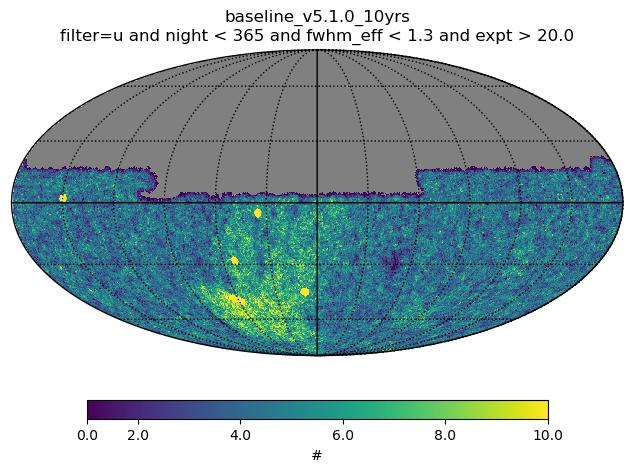

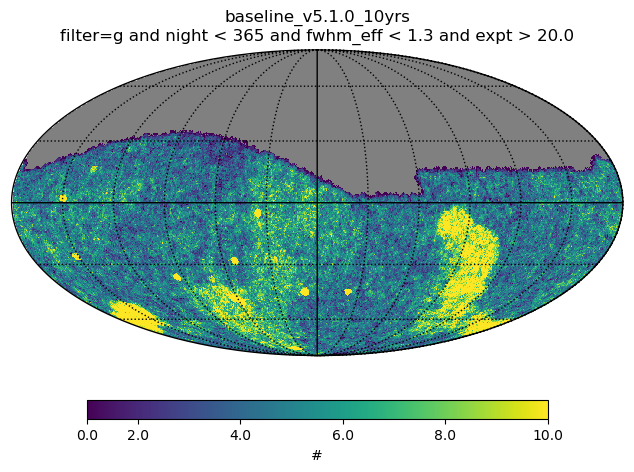

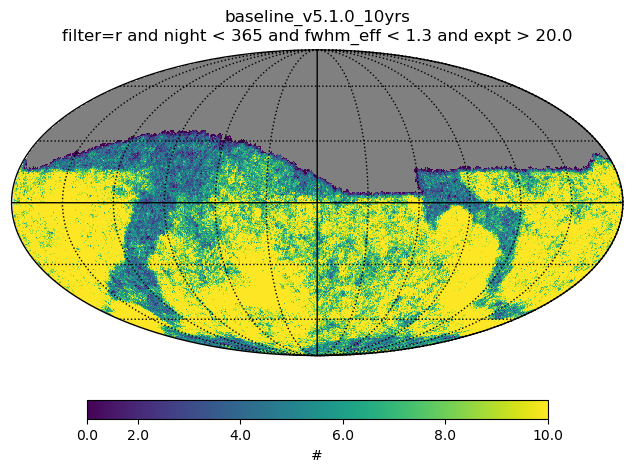

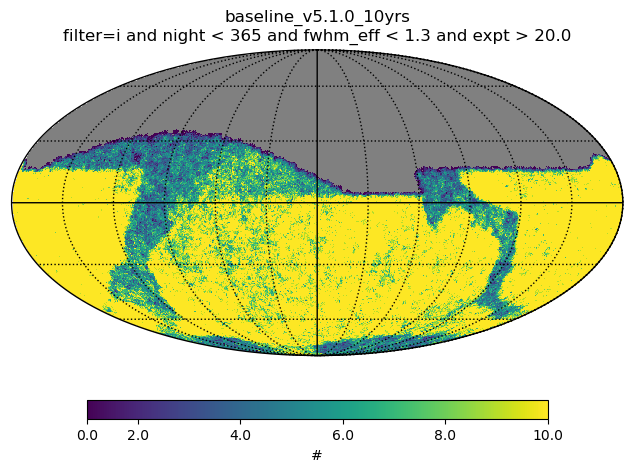

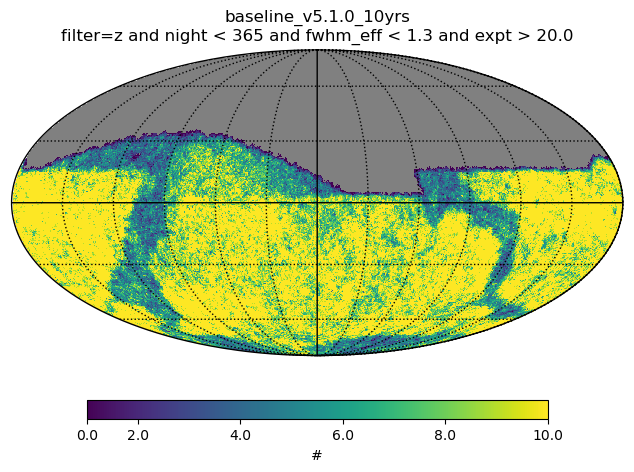

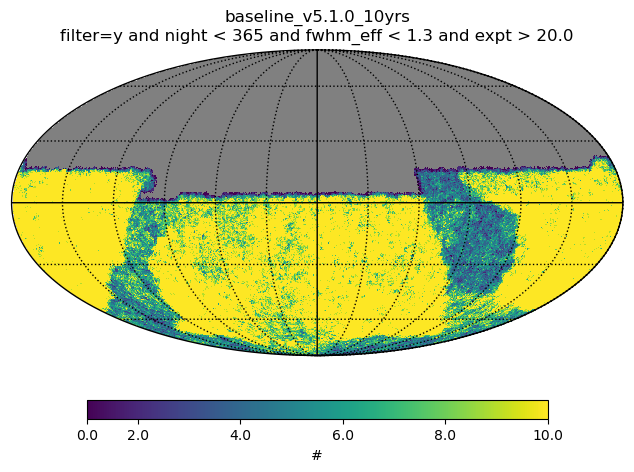

In [5]:
summary_rows = []
night_limit = 365
seeing_limit = 1.3
expt_limit = 20
for filtername in "ugrizy":
    info = {"run_name": run_name}
    
    sub_data = visits_array[np.where((visits_array["filter"] == filtername) &
                                     (visits_array["night"] < night_limit) &
                                     (visits_array["seeingFwhmEff"] < seeing_limit) &
                                    (visits_array["visitExposureTime"] > expt_limit))]
    info['observations_subset'] = "filter=%s and night < %i and fwhm_eff < %.1f and expt > %.1f" % (filtername, night_limit,
                                                                                                    seeing_limit, expt_limit)
    sl = maf.Slicer()
    metric = maf.CountMetric()
    hp_array, info = sl(sub_data, metric, info=info)
    pm = maf.PlotMoll(info=info)
    fig = pm(hp_array, max=10)
    
    n_needed = 4
    enough_indx = np.where(hp_array >= n_needed)[0]
    nside = hp.npix2nside(hp_array.size)
    area_aq = enough_indx.size * hp.nside2pixarea(nside, degrees=True)
    info["metric: unit"] = "Sq Deg"
    summary_rows.append(maf.gen_summary_row(info, "Area w/%i" % n_needed, area_aq))

In [6]:
pd.DataFrame(summary_rows)

,run_name,observations_subset,slicer: nside,metric: name,metric: col,metric: unit,summary_name,value
0,baseline_v5.1.0_10yrs,filter=u and night < 365 and fwhm_eff < 1.3 an...,128,Count,night,Sq Deg,Area w/4,19551.345465
1,baseline_v5.1.0_10yrs,filter=g and night < 365 and fwhm_eff < 1.3 an...,128,Count,night,Sq Deg,Area w/4,23295.854063
2,baseline_v5.1.0_10yrs,filter=r and night < 365 and fwhm_eff < 1.3 an...,128,Count,night,Sq Deg,Area w/4,26499.018260
3,baseline_v5.1.0_10yrs,filter=i and night < 365 and fwhm_eff < 1.3 an...,128,Count,night,Sq Deg,Area w/4,26767.172580
4,baseline_v5.1.0_10yrs,filter=z and night < 365 and fwhm_eff < 1.3 an...,128,Count,night,Sq Deg,Area w/4,26699.819265
5,baseline_v5.1.0_10yrs,filter=y and night < 365 and fwhm_eff < 1.3 an...,128,Count,night,Sq Deg,Area w/4,23937.703878


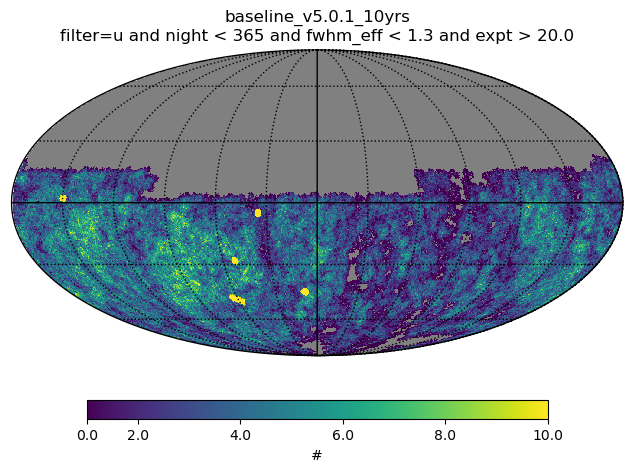

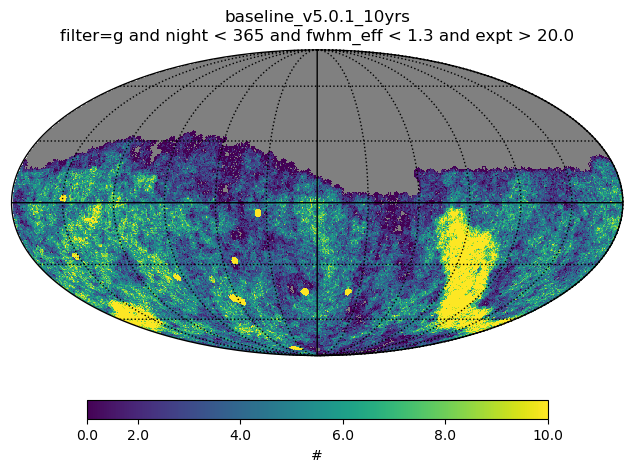

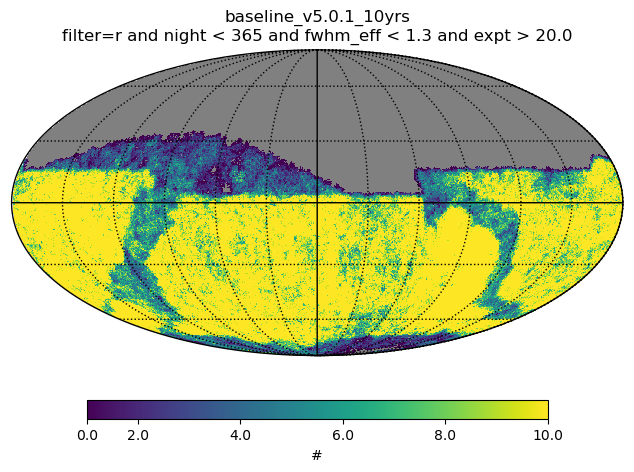

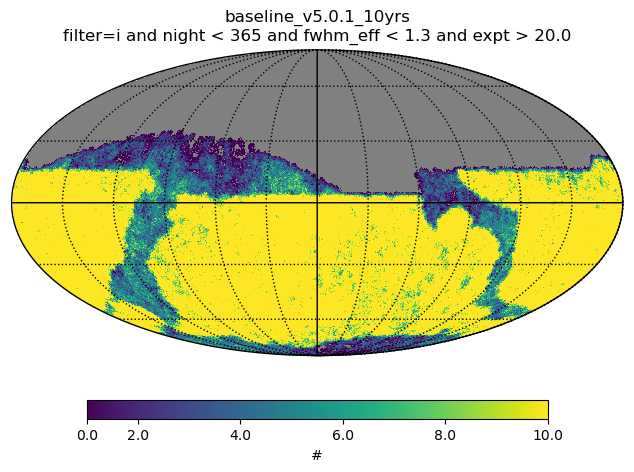

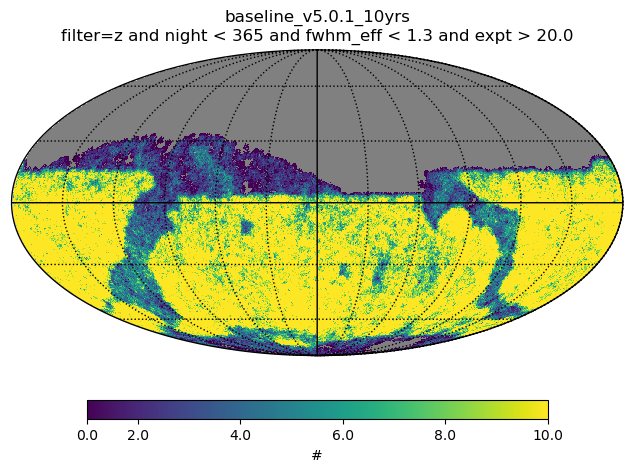

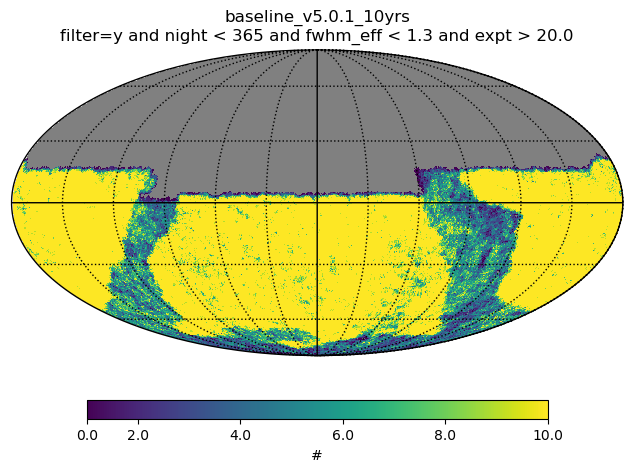

In [7]:
filename = "baseline_v5.0.1_10yrs.db"
run_name = filename.replace(".db", "")
con = sqlite3.connect(filename)
df = pd.read_sql("select * from observations", con)
con.close()

# Convert to a numpy array
visits_array = df.to_records(index=False)

summary_rows = []
for filtername in "ugrizy":
    info = {"run_name": run_name}
    sub_data = visits_array[np.where((visits_array["filter"] == filtername) &
                                     (visits_array["night"] < night_limit) &
                                     (visits_array["seeingFwhmEff"] < seeing_limit) &
                                    (visits_array["visitExposureTime"] > expt_limit))]
    info['observations_subset'] = "filter=%s and night < %i and fwhm_eff < %.1f and expt > %.1f" % (filtername, night_limit,
                                                                                                    seeing_limit, expt_limit)

    sl = maf.Slicer()
    metric = maf.CountMetric()
    hp_array, info = sl(sub_data, metric, info=info)
    pm = maf.PlotMoll(info=info)
    fig = pm(hp_array, max=10)
    
    n_needed = 4
    enough_indx = np.where(hp_array >= n_needed)[0]
    nside = hp.npix2nside(hp_array.size)
    area_aq = enough_indx.size * hp.nside2pixarea(nside, degrees=True)
    info["metric: unit"] = "Sq Deg"
    summary_rows.append(maf.gen_summary_row(info, "Area w/%i" % n_needed, area_aq))


In [8]:
pd.DataFrame(summary_rows)

,run_name,observations_subset,slicer: nside,metric: name,metric: col,metric: unit,summary_name,value
0,baseline_v5.0.1_10yrs,filter=u and night < 365 and fwhm_eff < 1.3 an...,128,Count,night,Sq Deg,Area w/4,11556.234201
1,baseline_v5.0.1_10yrs,filter=g and night < 365 and fwhm_eff < 1.3 an...,128,Count,night,Sq Deg,Area w/4,17867.512589
2,baseline_v5.0.1_10yrs,filter=r and night < 365 and fwhm_eff < 1.3 an...,128,Count,night,Sq Deg,Area w/4,24804.484391
3,baseline_v5.0.1_10yrs,filter=i and night < 365 and fwhm_eff < 1.3 an...,128,Count,night,Sq Deg,Area w/4,24632.848840
4,baseline_v5.0.1_10yrs,filter=z and night < 365 and fwhm_eff < 1.3 an...,128,Count,night,Sq Deg,Area w/4,23349.568857
5,baseline_v5.0.1_10yrs,filter=y and night < 365 and fwhm_eff < 1.3 an...,128,Count,night,Sq Deg,Area w/4,23416.082878
